Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('Country-data.csv')
# pd.pandas.set_option(max_columns)

In [16]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
data_dic = pd.read_csv('data-dictionary.csv')

In [5]:
data_dic

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


# UNDERSTANDING DATA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


'country' has 167 unique values, 
hence encoding this and using this as a feature is not going to be of any use to our model. 
The rest of the features are numeric.

In [8]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [17]:
df_num = df.iloc[:, 1:]

In [18]:
df_num

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [27]:
df_num.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [28]:
# df_num[['child_mort', 'life_expec']].corr()

In [29]:
# df_num[['child_mort', 'total_fer']].corr()

In [30]:
# df_num[['child_mort', 'gdpp']].corr()

In [31]:
# df_num[['child_mort', 'income']].corr()

<AxesSubplot:xlabel='child_mort', ylabel='life_expec'>

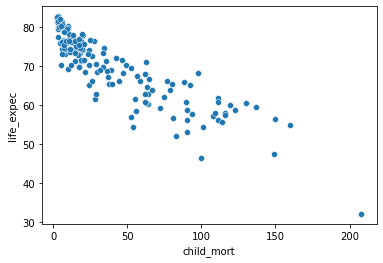

In [33]:
sns.scatterplot(data = df_num, x = 'child_mort', y = 'life_expec')

<AxesSubplot:xlabel='child_mort', ylabel='total_fer'>

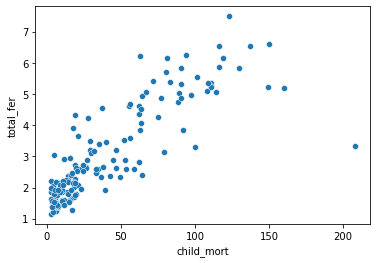

In [34]:
sns.scatterplot(data = df_num, x = 'child_mort', y = 'total_fer')

<AxesSubplot:xlabel='child_mort', ylabel='child_mort'>

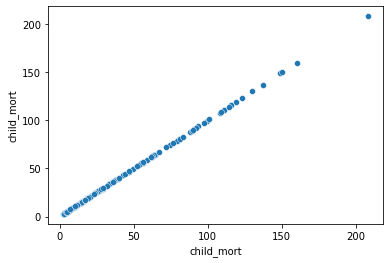

In [35]:
sns.scatterplot(data = df_num, x = 'child_mort', y = 'child_mort')

<AxesSubplot:xlabel='child_mort', ylabel='inflation'>

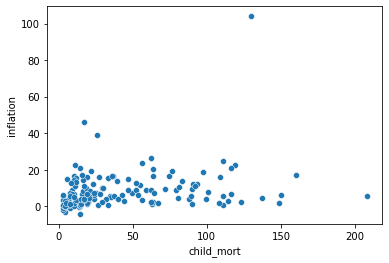

In [36]:
sns.scatterplot(data = df_num, x = 'child_mort', y = 'inflation')

<AxesSubplot:>

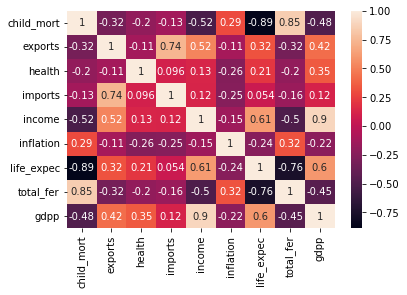

In [38]:
sns.heatmap(df_num.corr(), annot= True)

# Scaling the data and making the pipeline

In [39]:
from sklearn.preprocessing import StandardScaler

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans


In [42]:
steps = [('scaler', StandardScaler()), ('model', KMeans(n_clusters=2))]

In [44]:
pipeline = Pipeline(steps)

In [45]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('model', KMeans(n_clusters=2))])

In [46]:
clusters = pipeline.fit_predict(df_num)

In [47]:
clusters

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [48]:
df_clusters = df_num.copy()

In [49]:
df_clusters['Clusters'] = clusters

In [50]:
df_clusters

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [51]:
df_clusters.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032,0.783487
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725,-0.330859
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966,-0.219569
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498,-0.111527
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571,-0.556992
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631,0.260839
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089,-0.808108
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910,0.804917
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000,-0.498112
Clusters,0.783487,-0.330859,-0.219569,-0.111527,-0.556992,0.260839,-0.808108,0.804917,-0.498112,1.000000


In [58]:
df_clusters.corr()['Clusters']

child_mort    0.783487
exports      -0.330859
health       -0.219569
imports      -0.111527
income       -0.556992
inflation     0.260839
life_expec   -0.808108
total_fer     0.804917
gdpp         -0.498112
Clusters      1.000000
Name: Clusters, dtype: float64

In [61]:
df_clu = pd.DataFrame(df_clusters.corr()['Clusters'])

In [62]:
df_clu

,Clusters
child_mort,0.783487
exports,-0.330859
health,-0.219569
imports,-0.111527
income,-0.556992
inflation,0.260839
life_expec,-0.808108
total_fer,0.804917
gdpp,-0.498112
Clusters,1.000000


<AxesSubplot:ylabel='life_expec'>

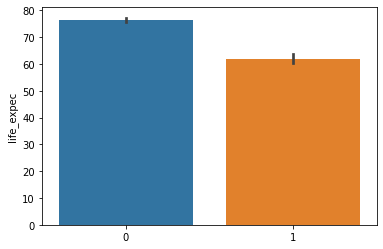

In [69]:
 sns.barplot(data=df_num, x=clusters, y='life_expec')

<AxesSubplot:ylabel='total_fer'>

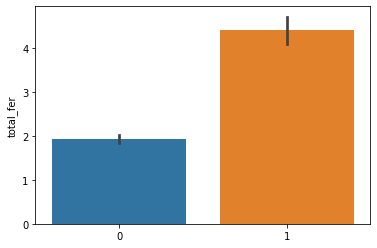

In [68]:
 sns.barplot(data=df_num, x=clusters, y='total_fer')

In [75]:
df_clusters.groupby('Clusters')['child_mort'].mean()

Clusters
0    12.161616
1    76.280882
Name: child_mort, dtype: float64

In [76]:
df_clusters.groupby('Clusters')['total_fer'].mean()

Clusters
0    1.941111
1    4.413824
Name: total_fer, dtype: float64

In [77]:
df_clusters.groupby('Clusters')['life_expec'].mean()

Clusters
0    76.493939
1    61.910294
Name: life_expec, dtype: float64

In [79]:
# df_clusters.groupby('Clusters')['inflation'].mean()

# Elbow Method

In [89]:
wscc = []


for i in range (1,5):
    kmeans_models = KMeans(n_clusters= i)
    kmeans_models.fit_predict(df_num)
    
    wscc_iter = kmeans_models.inertia_    
    wscc.append(wscc_iter)

C:\Users\padma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [90]:
wscc

[117459687469.07817, 36528387934.3221, 21710210039.75414, 14610713446.535133]

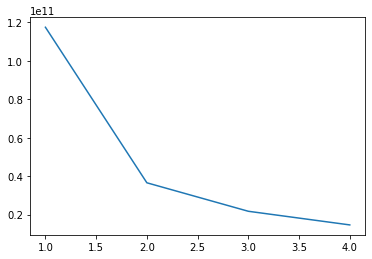

In [91]:
plt.plot(range(1,5), wscc)

# Consider Clusters = 3

In [94]:
kmeans_models = KMeans(n_clusters= 3)
df_clusters1 = kmeans_models.fit_predict(df_num)

In [95]:
df_clusters1

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [96]:
df_copy = df_num.copy()

In [97]:
df_copy['Clusters'] = df_clusters1

In [98]:
df_copy

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [102]:
df_copy['Country_type'] = df_copy['Clusters'].map({0:'Low Income', 1:'Medium Income', 2: 'High Income'})

In [103]:
df_copy

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters,Country_type
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,Low Income
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Low Income
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Low Income
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,Low Income
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Low Income
...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,Low Income
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,Low Income
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,Low Income
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,Low Income


In [115]:
df_copy.groupby('Country_type')['gdpp'].mean()

Country_type
High Income      35587.500000
Low Income        4438.390625
Medium Income    65442.857143
Name: gdpp, dtype: float64

In [107]:
df_copy.groupby('Country_type')['total_fer'].mean()

Country_type
High Income      1.944687
Low Income       3.263359
Medium Income    1.767143
Name: total_fer, dtype: float64

In [108]:
df_copy.groupby('Country_type')['life_expec'].mean()

Country_type
High Income      79.156250
Low Income       67.873437
Medium Income    80.285714
Name: life_expec, dtype: float64

In [109]:
df_copy.groupby('Country_type')['inflation'].mean()

Country_type
High Income      3.383312
Low Income       8.957648
Medium Income    6.388714
Name: inflation, dtype: float64

In [110]:
df_copy.groupby('Country_type')['health'].mean()

Country_type
High Income      8.991563
Low Income       6.332031
Medium Income    5.712857
Name: health, dtype: float64

In [111]:
df_copy.groupby('Country_type')[['imports', 'exports']].mean()

,imports,exports
Country_type,,
High Income,46.021875,49.978125
Low Income,45.921609,35.865617
Medium Income,68.571429,96.442857


# Making an output file
Output file consists of country followed by its country type

In [112]:
output = pd.DataFrame({'Country':pd.read_csv('Country-data.csv')['country'], 'Country_type':df_copy['Country_type']})
output.to_csv('overall_economic.csv', index=False)

In [113]:
pd.read_csv('overall_economic.csv')

,Country,Country_type
0,Afghanistan,Low Income
1,Albania,Low Income
2,Algeria,Low Income
3,Angola,Low Income
4,Antigua and Barbuda,Low Income
...,...,...
162,Vanuatu,Low Income
163,Venezuela,Low Income
164,Vietnam,Low Income
165,Yemen,Low Income
